<a href="https://colab.research.google.com/github/FTCLuis/Mineracao-de-Dados/blob/main/Luis_Felipe_Laudacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

# **Importação dos Dados**

Importando todas as bibliotecas para a utilização durante o notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Agora, vamos mostrar o dataset

In [5]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Para um entendimento melhor do todas as colunas do dataset, vamos elaborar um pequeno dicionário com a explicação de cada coluna.

---


- **unnamed** - parece ser uma coluna de índice que podemos remover

- **country** - país onde o vinho foi feito (interessante)

- **description** - descrição do vinho

- **designation** - vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas.

- **points** - é o número de pontos que o vinho obteve em sua avaliação (precisamos entender a escala de pontos)

- **price** - preço da garrafa de vinho

- **province** - é a província (estado) onde o vinho foi feito

- **region_1** - é a região onde o vinho foi feito

- **region_2** - região mais específica dentro de uma vitícola (podemos remover isso)

- **taster_name** - nome do revisor

- **taster_twitter_handle** - perfil do Twitter do avaliador

- **title** - nome do vinho analisado (o ano de fabricação está no título)

- **variety** - tipo de uvas utilizadas na fabricação do vinho

- **winery** - adega onde o vinho foi feito.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Temos, no nosso dataset, 129.971 registros, com 14 colunas ao todo. Podemos perceber também que, existem dados em colunas que estão nulos, e que precisaremos tirar para uma melhor análise da nossa base.

In [7]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


O describe mostra que existe uma variação de **pontuação** e de **preço**. A variação de pontuação, podemos seguir uma tabelinha de classificação:

- **98–100** – Clássico
- **94–97** – Soberbo
- **90–93** – Excelente
- **87–89** – Muito bom
- **83–86** – Bom
- **80–82** – Aceitável

In [8]:
df['country'].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


  Podemos visualizar que, a maioria dos vinhos presentes na tabela são dos **Estados Unidos**, **França**, **Itália**, **Espanha** e **Portugal**.

In [9]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


Já com o **Variety**, podemos ver quais foram os tipos de uvas que mais foram utilizadas durante as fabricações dos vinhos.


O próximo passo seria fazer a limpeza dos dados, para retirar colunas que não iremos utilizar ou dados nulos que possam existir no dataframe.

# Limpando os Dados

Antes de fazer qualquer coisa no dataframe, temos que fazer uma cópia do dataframe para evitar qualquer tipo de acidente que possa ocorrer durante a análise dos dados.

In [10]:
df1 = df.copy()

Agora vamos remover todas as colunas que não iremos utilizar na nossa análise:

In [11]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Vamos agora retirar todos os dados que estão nulos nos registros na tabela:

In [12]:
df1 = df1.dropna(subset=["country", "price", "province", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


# Análise Exploratória

Vamos começar visualizando os dados de início, onde existe a distribuição dos pontos durante as avaliações dos vinhos.

Text(0, 0.5, 'Frequência')

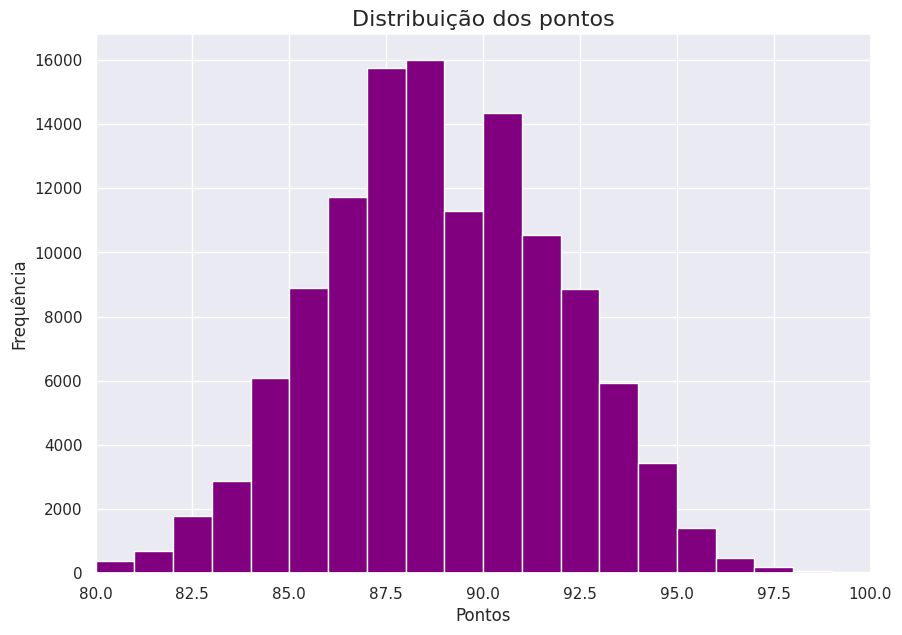

In [15]:
plt.figure(figsize=(10, 7))
plt.hist(df1['points'],
         bins=np.arange(80, df1['points'].max()+1, 1),
         color='purple')
plt.xlim(80,100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

Podemos ver que existe uma distribuição quase normal dos pontos, variando a escala de 80 e 100. Podemos ver também quais são os países que estão no Top 10 da produção de vinho.

In [16]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


Com base nesse filtro, podemos gerar um gráfico desses respectivos países.


Text(0, 0.5, 'Total de avaliações')

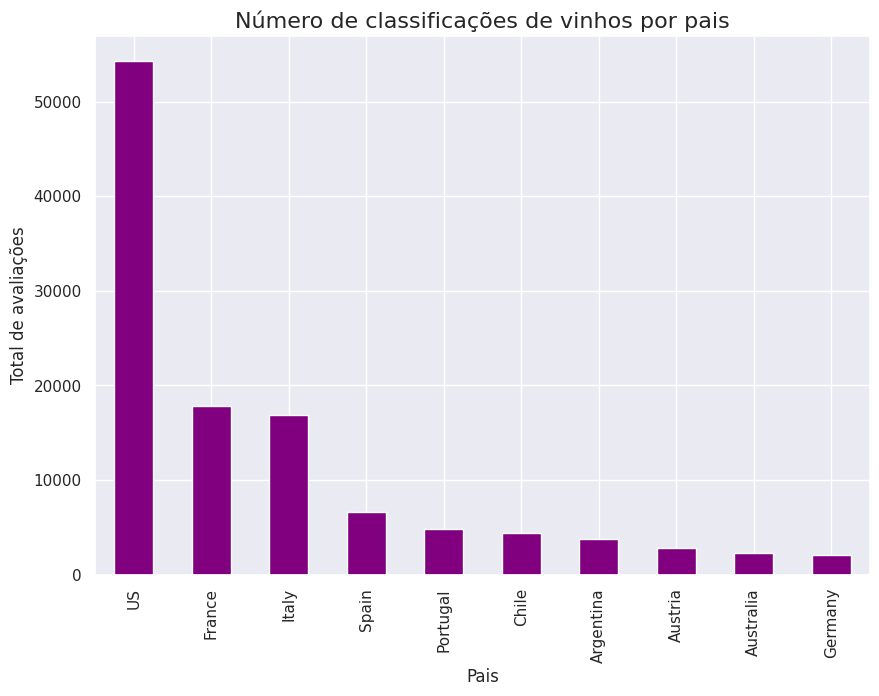

In [17]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color = 'purple')
plt.title('Número de classificações de vinhos por pais', fontsize = 16)
plt.xlabel('Pais')
plt.ylabel('Total de avaliações')

Com base nessa ordenação do gráfico acima, vamos investigar quantos países produzem vinho de melhor qualidade de acordo com as
classificações vista no site.

In [18]:
melhor_qualidade = df1.groupby("country") ['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False) [:10]
# Converter em uma Serie o DataFrame usando o metodo to_frame()
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples',high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


Podemos gerar um gráfico desse filtro:

<ipython-input-19-3fe99521bced>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

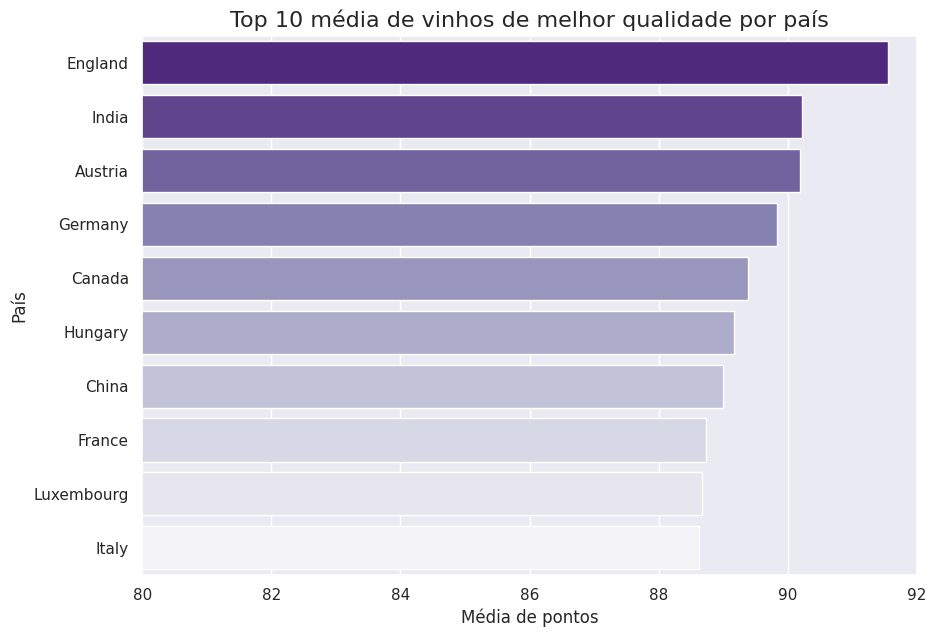

In [19]:
y = melhor_qualidade. index. to_series()
x = melhor_qualidade # Access the values in the Series directly

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize = 16)
plt.xlabel('Média de pontos')
plt.ylabel('País')

Ao verificar a média de pontos, podemos perceber que o país com melhor avaliação foi a Inglaterra. Isso ocorre, porque talvez haja menos vinhos da Inglaterra no nosso DataFrame e eles tenham uma pontuação alta, representando um aumento na média. Vale a pena investigarmos isso mais a fundo, podemos olhar para os países com pontuação máxima acima de 95.

In [20]:
# número de vinhos por país com classificações mais altas 95-100
high_scores = df1[df1["points"]>=95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Os países com classificação mais alta de 95-100 pontos, diferem do nosso gráfico de pontuações mais altas com base nas médias. Podemos
criar um gráfico do tipo boxplot que nos permitirá ver o máximo, o mínimo e a média das pontuações por cada país. E podemos ver que essa nossa base de dados apresenta mais vinhos avaliados dos EUA, além de é provável que haja uma grande variedade de vinhos do país, enquanto a Inglaterra, que teve a melhor pontuação média, apresenta poucos vinhos na base de dados, resultando em uma comparação injusta entre os dois.

Text(0, 0.5, 'País')

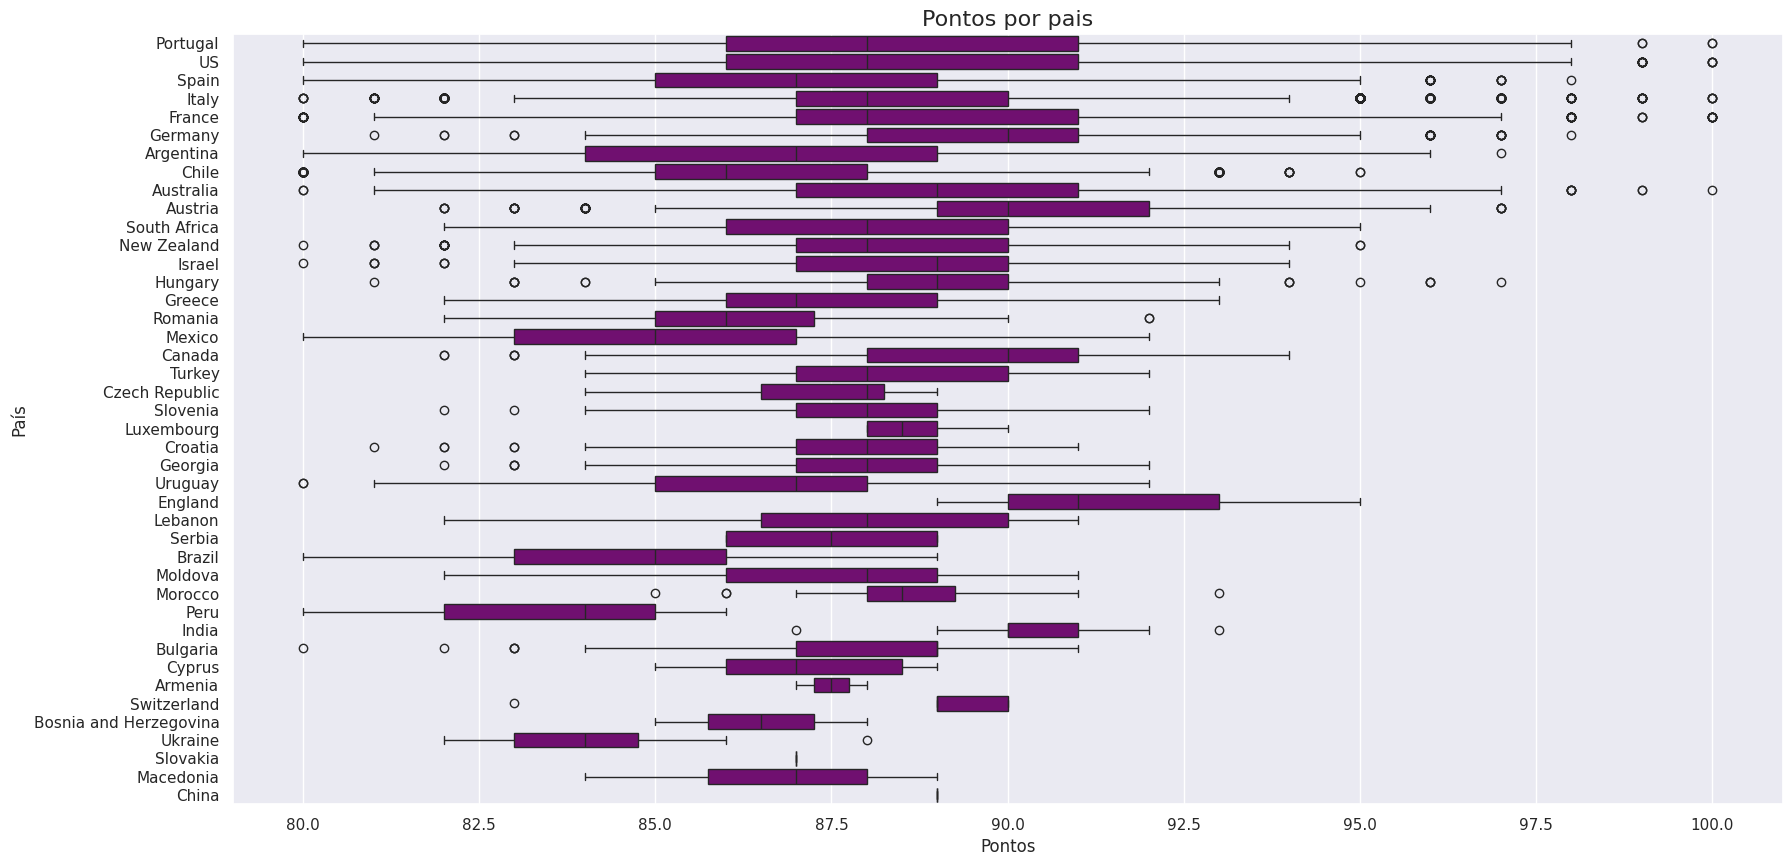

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color = 'Purple')
plt.title('Pontos por pais', fontsize = 16)
plt.xlabel('Pontos')
plt.ylabel('País')

Podemos ver que, embora a Inglaterra tenha a média mais alta, ela não possui vinhos em qualidade máxima, diferentemente de Portugal, EUA, Itália, França e Austrália.

<ipython-input-23-7e47ea8768e8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

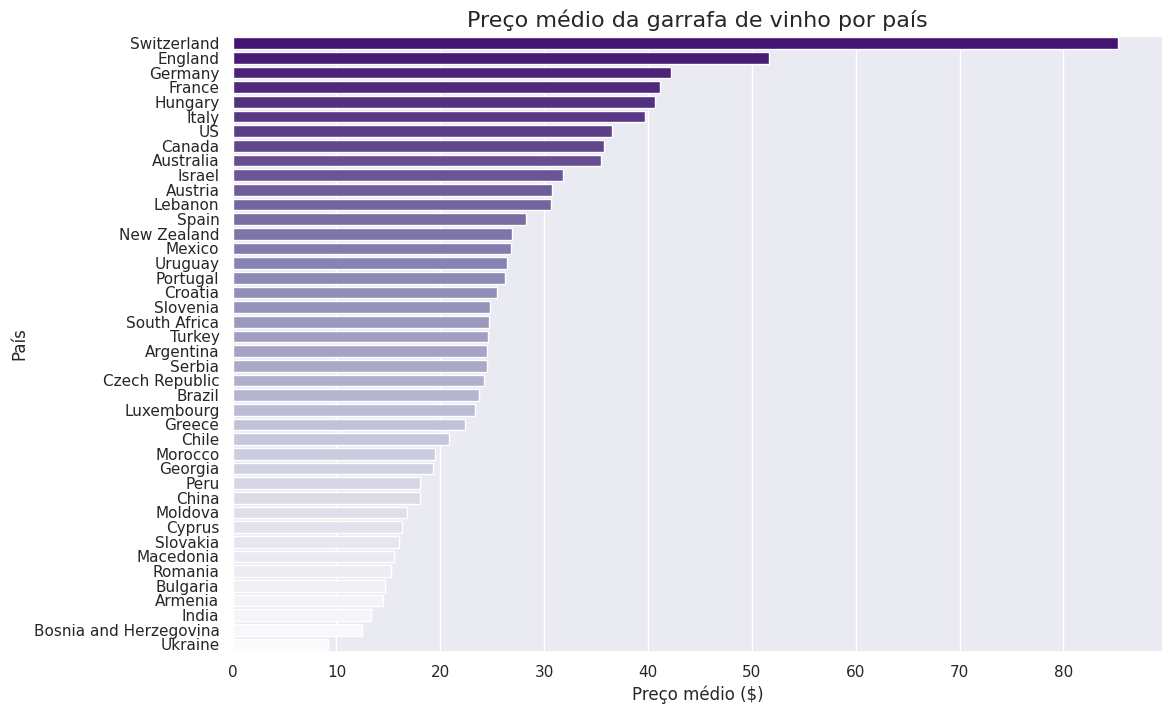

In [23]:
average_price = df1. groupby("country") ['price' ].mean() # Calculate the mean of the 'price' column only.
average_price = average_price.sort_values(ascending=False) # Sort values in descending order
y = average_price.index. to_series ()
x = average_price.values # Use values instead of accessing by key

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize = 16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')

Podemos ver que a Suiça produz o vinho mais caro, custando mais de `$80` por garrafa. Já a Ucrânia, no outro extremo, produz o vinho mais barato, custando abaixo de `$10` por garrafa. Podemos também investigar se a qualidade do vinho está relacionada com o preço dele.

Text(0, 0.5, 'Frequência')

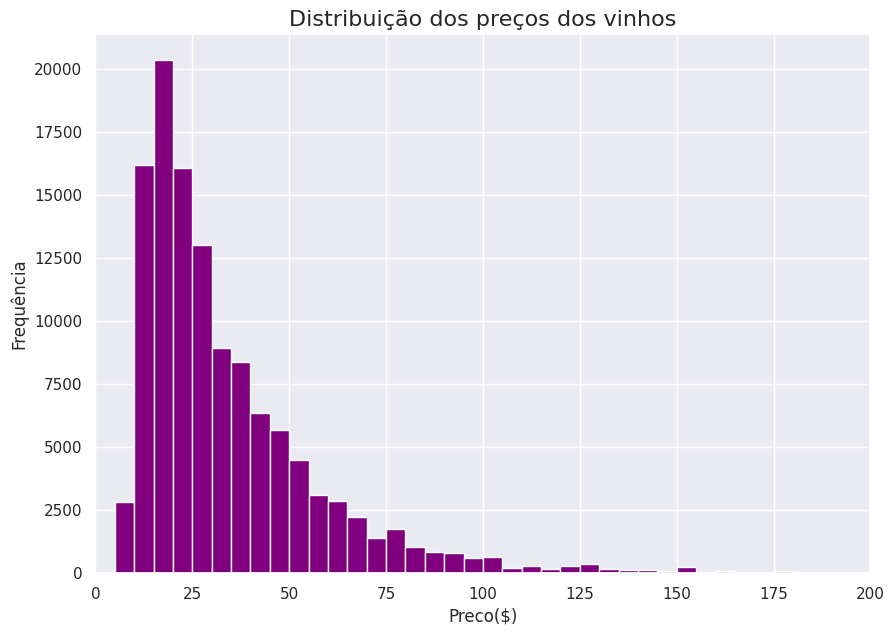

In [25]:
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color = 'Purple')
plt.xlim(0,200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preco($)')
plt.ylabel('Frequência')

Podemos ver que os dados de preço dos vinhos apresentam uma distorção grande para a direita. Nesse caso precisamos de uma transformação
logarítmica nos dados.

In [26]:
# distribuição normal
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [27]:
# distribuição logarítmica
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


Agora utilizando os dados com a transformação logarítmica para o nosso histograma:

Text(0, 0.5, 'Frequência')

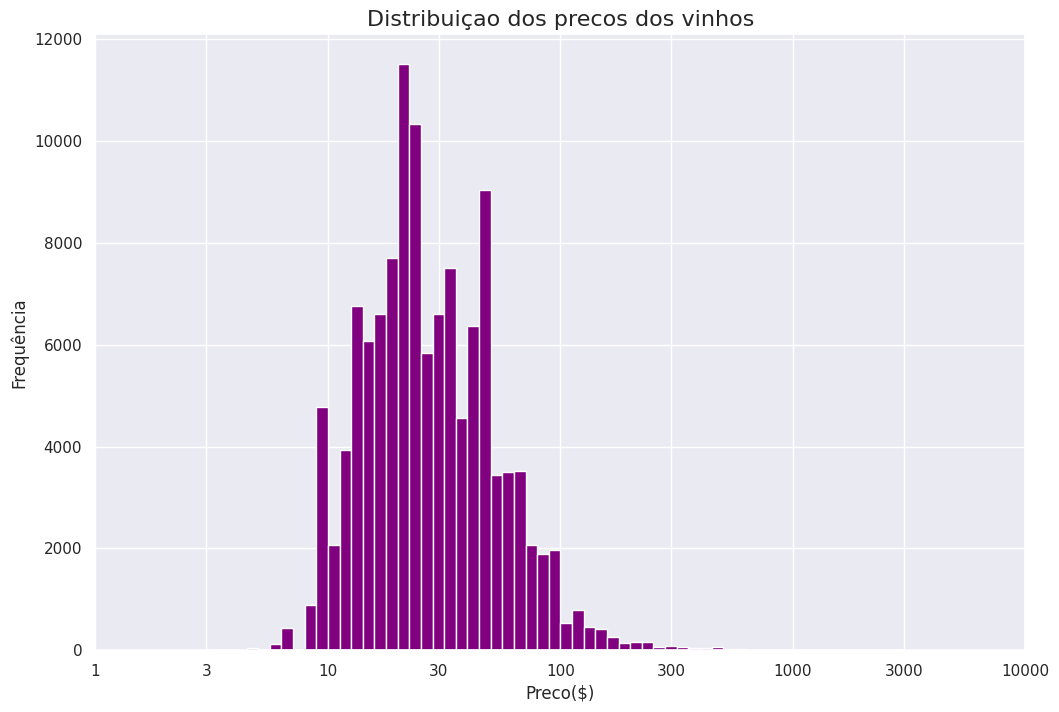

In [28]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='Purple' )
plt.title('Distribuiçao dos precos dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preco($)')
plt.ylabel('Frequência')

Agora é possível ver uma distribuição quase normal entre os valores. Existe um salto na região dos `$10` e um pico mais visível em pouco
mais de `$20`. Depois temos outro pico acima de `$50`. Agora podemos plotar um gráfico do tipo scatter para visualizar se existe uma
correlação entre a pontuacao e o valor da garrafa.

Text(0, 0.5, 'Pontos')

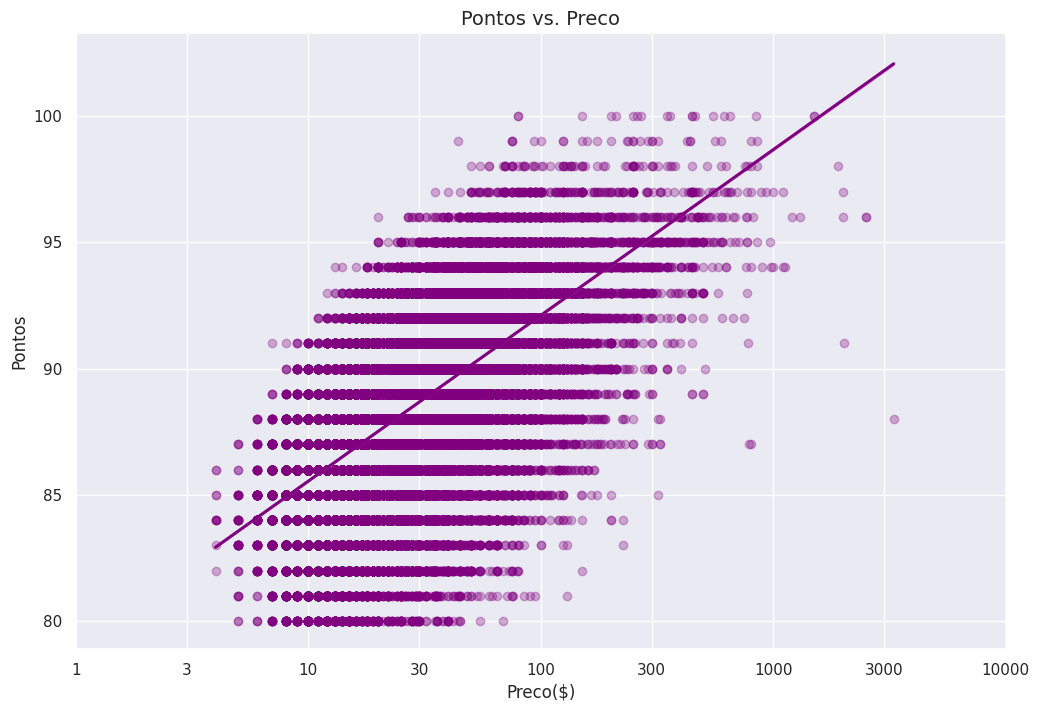

In [30]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha':0.3})
plt.title("Pontos vs. Preco", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Preco($)")
plt.ylabel("Pontos")

O gráfico nos mostra uma relação positiva entre as duas variáveis (pontuação e preços), ou seja, vinhos mais caros tendem a receber melhores
avaliações. Também é possível observar dois pontos mais afastados, um na região dos `$4` e outro pouco depois de `$3000`. Vamos listar esses
dois valores para descobrir quais vinhos são esses, buscando pelo valor máximo e mínimo:

In [31]:
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [32]:
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Podemos ver que existe um vinho espanhol com 85 pontos custando `$4`, e um vinho francês custando $`3300`.

Porém, com esses dois exemplos, vemos que nem sempre o vinho mais barato é muito pior que os vinhos mais caros. Então, podemos investigar quais tipos de vinhos e suas uvas utilizadas são os melhores e como eles ficam na classificação.

In [33]:
df1["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


Gráfico Boxplot:



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

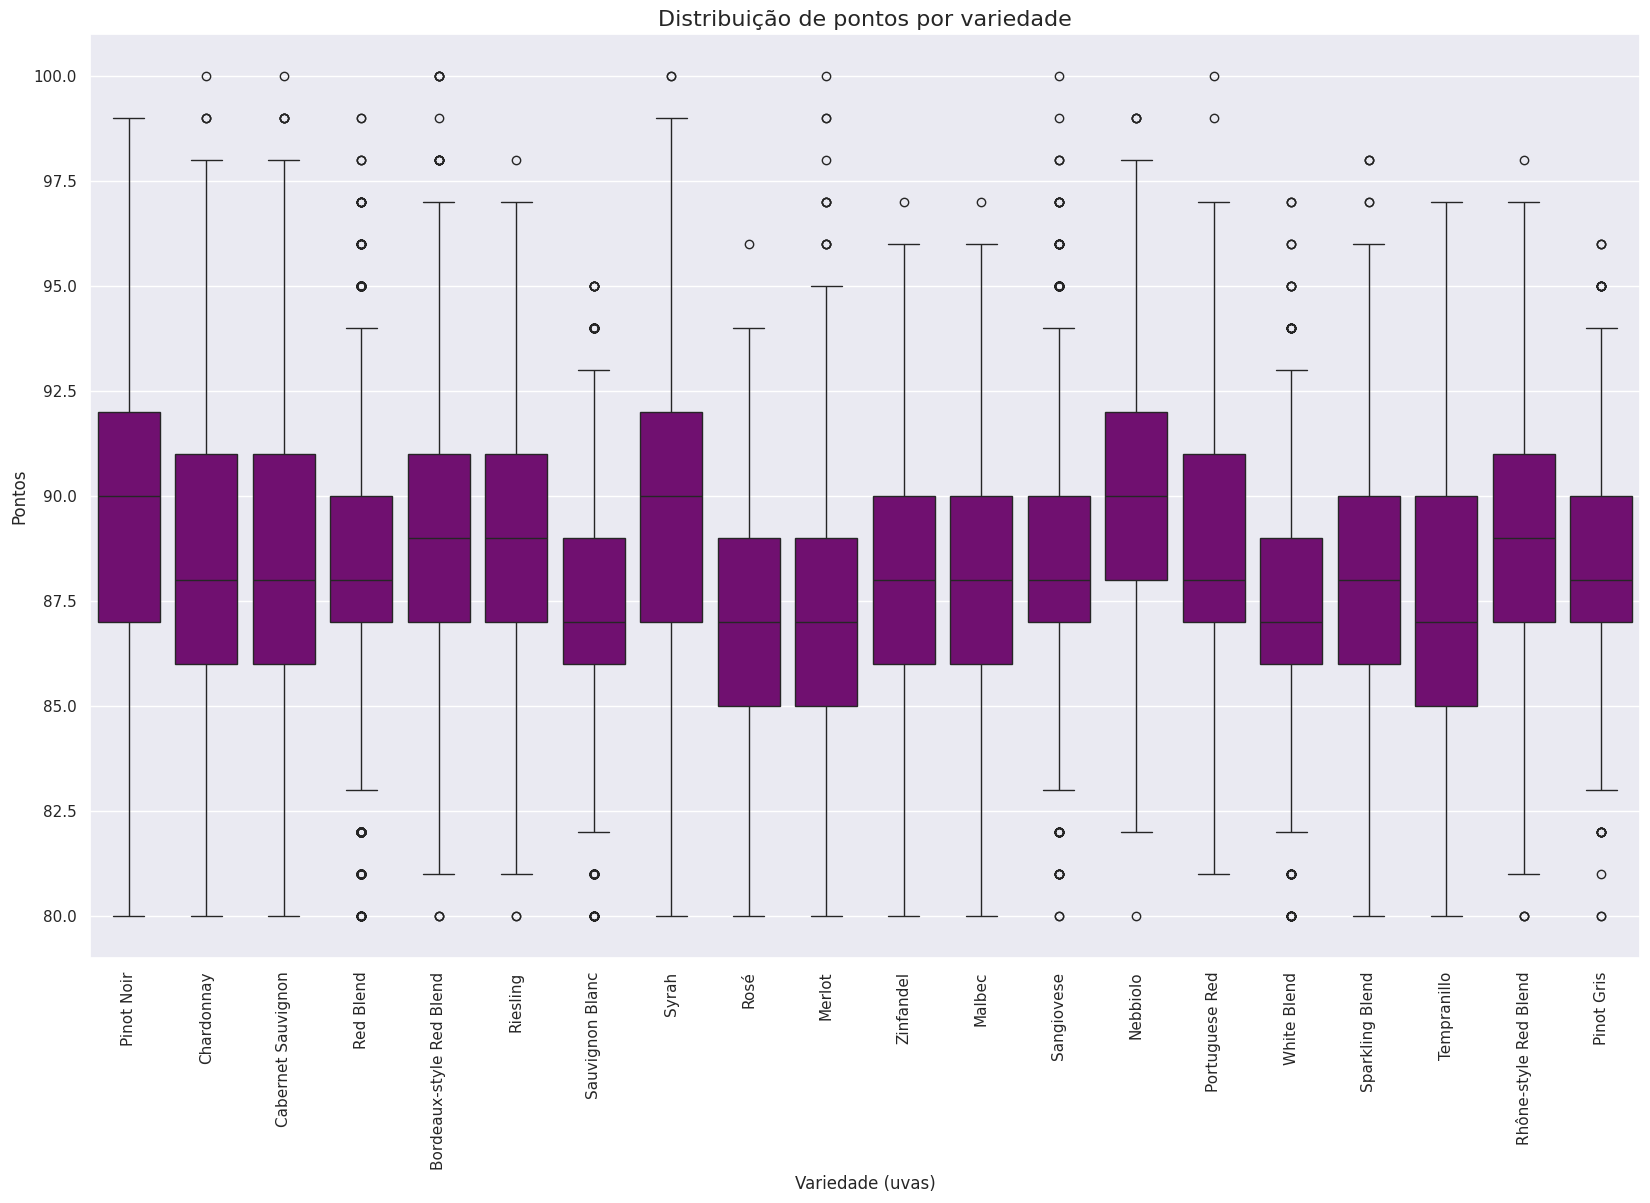

In [35]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color="Purple",
            order=df1["variety"].value_counts().iloc[:20].index)

plt.title('Distribuição de pontos por variedade', fontsize = 16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)

Listando o Top 20 melhores vinhos na base de dados, vemos que a variedade Pinot Noir tende a ter os melhores vinhos, com a pontuação média mais alta.
Com essas informação, sabemos que a qualidade está fortemente relacionada ao preço, mas nem todos os clientes podem gastar 3000 dólares em uma garrafa de
vinho toda semana. Nossa tarefa agora é descobrir o melhor custo-benefício em algumas faixas de preço.

- Até `$15`;
- Entre `$15` e `$30`;
- Entre `$30` e `$50`;
- Acima de `$50`;